In [1]:
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import pandas_ta as ta

In [2]:
stock_symobl = "AMC"

In [3]:
stock = yf.Ticker(stock_symobl)

In [4]:
# get historical market data
hist = stock.history(period="6mo")

In [5]:
hist['RSI'] = hist.ta.rsi()

In [6]:
hist

,open,high,low,close,volume,Dividends,Stock Splits,RSI
date,,,,,,,,
2020-12-04,3.750000,3.760000,3.300000,3.510000,33157300,0,0,NaN
2020-12-07,3.450000,3.740000,3.330000,3.560000,20503900,0,0,NaN
2020-12-08,3.610000,4.020000,3.610000,3.980000,29530600,0,0,NaN
2020-12-09,4.220000,4.330000,3.750000,3.860000,20991200,0,0,NaN
2020-12-10,3.790000,4.100000,3.770000,4.090000,19872800,0,0,NaN
...,...,...,...,...,...,...,...,...
2021-05-27,18.610001,29.760000,18.309999,26.520000,700486600,0,0,86.811130
2021-05-28,31.809999,36.720001,24.170000,26.120001,660623600,0,0,84.924860
2021-06-01,31.889999,33.529999,28.530001,32.040001,508694600,0,0,88.802692


In [7]:
hist[['MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9']] = hist.ta.macd(inplace=True)

In [8]:
hist['SMA'] = hist.ta.sma()

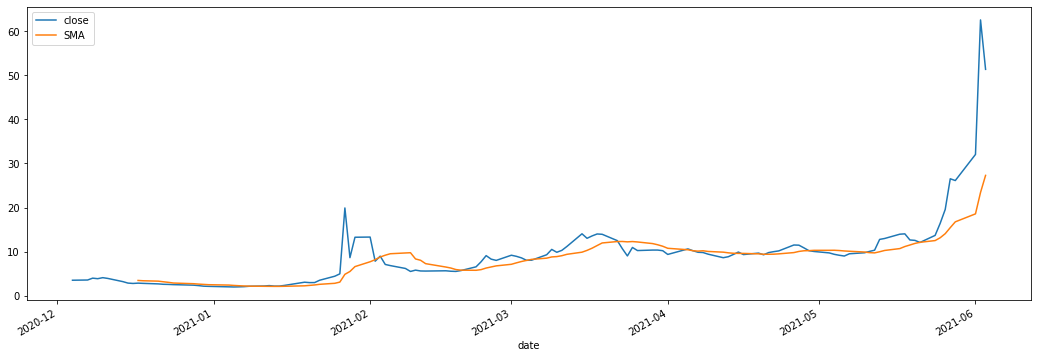

In [9]:
hist[['close', 'SMA']].plot(figsize=(18,6));

In [10]:
hist.iloc[-1:]

,open,high,low,close,volume,Dividends,Stock Splits,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA
date,,,,,,,,,,,,
2021-06-03,58.099998,68.800003,37.66,51.34,593313300,0,0,77.381356,8.634675,4.431458,4.203217,27.285


In [34]:
# API = '9R2V38OOYMP02MHZ'
# ti = TechIndicators(key=API, output_format='pandas')
# data = ti.get_rsi(symbol=stock_symobl,
#                   interval='daily',
#                   time_period=14,
#                   series_type='close')

# data

In [121]:
# Get all candle patterns (This is the default behaviour)
hist.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.2.45b0
Total Indicators: 133
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlm

In [45]:
# # Skip first 14 days to have real values

# hist = hist.iloc[14:]

# print(hist)
# fig, (ax1, ax2) = plt.subplots(2)
# ax1.get_xaxis().set_visible(False)
# fig.suptitle(f'{stock_symobl}')

# hist['Close'].plot(ax=ax1)
# ax1.set_ylabel('Price ($)')
# hist['RSI'].plot(ax=ax2)
# ax2.set_ylim(0,100)
# ax2.axhline(30, color='r', linestyle='--')
# ax2.axhline(70, color='r', linestyle='--')
# ax2.set_ylabel('RSI')

# plt.show()

In [46]:
# ti = TechIndicators(key='9R2V38OOYMP02MHZ', output_format='pandas')

In [47]:
# data, meta_data = ti.get_rsi(symbol=stock_symobl,
#                              interval='daily',
#                              time_period=14,
#                              series_type='close')
# data.plot()
# plt.title(f'RSI indicator for {stock_symobl} stock')
# plt.show()

In [51]:
def get_data(tickers):
    
    data = yf.download(tickers,  # or pdr.get_data_yahoo(...
            # tickers list or string as well
            # tickers = "PATH",

            # use "period" instead of start/end
            # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            # (optional, default is '1mo')
            period = "6mo",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "1d",

            # group by ticker (to access via data['SPY'])
            # (optional, default is 'column')
            group_by = 'ticker',

            # adjust all OHLC automatically
            # (optional, default is False)
            auto_adjust = True,

            # download pre/post regular market hours data
            # (optional, default is False)
            prepost = True,

            # use threads for mass downloading? (True/False/Integer)
            # (optional, default is True)
            threads = True,

            # proxy URL scheme use use when downloading?
            # (optional, default is None)
            proxy = None
        )
    # data['Close'].plot(figsize=(16,8));
    data['RSI'] = data.ta.rsi(inplace=True) # Calculate RSI
    data['SMA'] = data.ta.sma(inplace=True)
    data[['MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9']] = data.ta.macd(inplace=True)
    
    return data

In [52]:
data = get_data(stock_symobl)
data

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume,RSI,SMA,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
date,,,,,,,,,,
2020-12-04,3.750000,3.760000,3.300000,3.510000,33157300,NaN,NaN,NaN,NaN,NaN
2020-12-07,3.450000,3.740000,3.330000,3.560000,20503900,NaN,NaN,NaN,NaN,NaN
2020-12-08,3.610000,4.020000,3.610000,3.980000,29530600,NaN,NaN,NaN,NaN,NaN
2020-12-09,4.220000,4.330000,3.750000,3.860000,20991200,NaN,NaN,NaN,NaN,NaN
2020-12-10,3.790000,4.100000,3.770000,4.090000,19872800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,18.610001,29.760000,18.309999,26.520000,700486600,86.811130,15.440,2.469120,1.262611,1.206509
2021-05-28,31.809999,36.720001,24.170000,26.120001,660623600,84.924860,16.754,3.106898,1.520311,1.586587
2021-06-01,31.889999,33.529999,28.530001,32.040001,508694600,88.802692,18.563,4.043426,1.965472,2.077955


In [53]:
data.iloc[-1:]

,open,high,low,close,volume,RSI,SMA,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
date,,,,,,,,,,
2021-06-03,58.099998,68.800003,37.66,51.34,593313300,77.381356,27.285,8.634675,4.431458,4.203217


In [68]:

def color_negative_red(val):
    color = 'red' if val < 30 else 'green'
    return 'color: %s' % color

In [69]:
s = data.style.applymap(color_negative_red, subset=['RSI'])
s

,open,high,low,close,volume,RSI,SMA,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
date,,,,,,,,,,
2020-12-04 00:00:00,3.750000,3.760000,3.300000,3.510000,33157300,nan,nan,nan,nan,nan
2020-12-07 00:00:00,3.450000,3.740000,3.330000,3.560000,20503900,nan,nan,nan,nan,nan
2020-12-08 00:00:00,3.610000,4.020000,3.610000,3.980000,29530600,nan,nan,nan,nan,nan
2020-12-09 00:00:00,4.220000,4.330000,3.750000,3.860000,20991200,nan,nan,nan,nan,nan
2020-12-10 00:00:00,3.790000,4.100000,3.770000,4.090000,19872800,nan,nan,nan,nan,nan
2020-12-11 00:00:00,4.040000,4.250000,3.870000,3.920000,22310400,nan,nan,nan,nan,nan
2020-12-14 00:00:00,4.010000,4.010000,3.000000,3.190000,67159000,nan,nan,nan,nan,nan
2020-12-15 00:00:00,3.240000,3.240000,2.760000,2.860000,54432100,nan,nan,nan,nan,nan
2020-12-16 00:00:00,2.870000,2.890000,2.720000,2.780000,25423200,nan,nan,nan,nan,nan


In [106]:
import schedule
import time

def job():
    data = get_data(stock_symobl)
    # data['Close'].plot(figsize=(16,8));

# schedule.every(1).seconds.do(job)
schedule.every(1).seconds.do(job)
# schedule.every().hour.do(job)
# schedule.every().day.at("10:30").do(job)
# schedule.every(5).to(10).minutes.do(job)
# schedule.every().monday.do(job)
# schedule.every().wednesday.at("13:15").do(job)
# schedule.every().minute.at(":17").do(job)

while True:
    schedule.run_pending()
    time.sleep(1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 